In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def mserror(matr_x, w, y_pred):
    y = matr_x.dot(w)
    return (sum((y - y_pred) ** 2)) / len(y)


def generateX_Y(n_objects, n_features):
    # сгенерируем вектор истинных весов
    w_true = np.random.normal(size=(n_features,))

    # сгенерируем матрицу X, вычислим Y с добавлением случайного шума
    X = np.random.uniform(-7, 7, (n_objects, n_features))
    Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

    return X, Y, w_true


def grad_descend(X, Y, eta, max_iter, min_weight_dist):
    # возьмем нулевые начальные веса
    w = np.zeros(n_features)

    # список векторов весов после каждой итерации
    w_list = []
    w_list.append(w.copy())

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    # список значений ошибок после каждой итерации
    errors = []

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X, new_w, Y))

        iter_num += 1
        w = new_w
        # if iter_num % 15 == 0:
        #     print('-' * 20)
        #     print(weight_dist)
        #     print(np.linalg.norm(X @ w - Y, ord=2))

    w_list = np.array(w_list)

    # print('-' * 20)
    # print(weight_dist)
    # print(np.linalg.norm(X @ w - Y, ord=2))
    # print(iter_num)
    # print('=' * 20)

    return w, w_list, errors




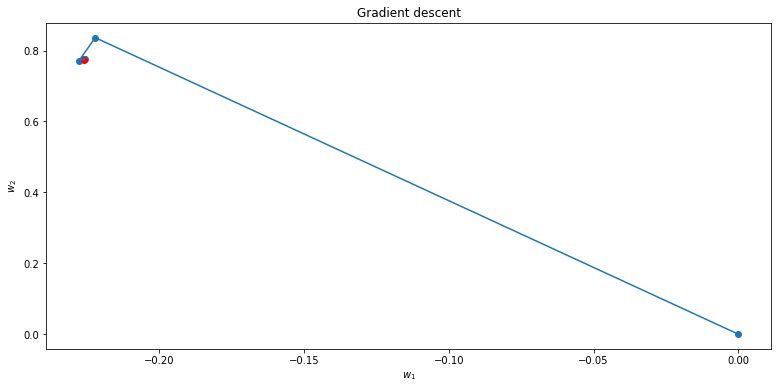

In [ ]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# шаг градиентного спуска
eta = 0.033
# максимальное число итераций
max_iter = 1e4
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1.1e-8



X, Y, w_true = generateX_Y(n_objects, n_features)
w, w_list, errors = grad_descend(X, Y, eta, max_iter, min_weight_dist)

# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

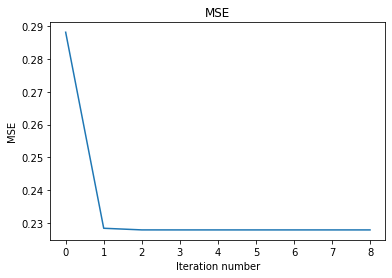

In [ ]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')